In [1]:
%pylab
%matplotlib inline

import pandas as pd
import seaborn as sns




Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib








________             ______                
__  ___/_____ __________  /_______ ________
_____ \_  __ `/_  ___/_  //_/  __ `/_  ___/
____/ // /_/ /_  /   _  ,<  / /_/ /_(__  ) 
/____/ \__,_/ /_/    /_/|_| \__,_/ /____/  
                                           


An open-source pure-python molecular dynamics code for non-ideal plasmas.


-------------- Pre Processing ----------------------

Job ID:  bim_mks
Job directory:  Simulations/bim_mks
Equilibration dumps directory:  Simulations/bim_mks/Equilibration/dumps
Production dumps directory:  Simulations/bim_mks/Production/dumps

Units:  mks
Total No. of particles =  10000

Particle Species:
No. of species =  2
Species 1 : C
	Species ID: 0
	No. of particles = 9000 
	Number density = 9.000000e+35 [N/m^3]
	Mass = 1.672622e-27 [kg]
	Charge = 1.602177e-19 [C]
	Temperature = 2.693700e+05 [K]
Species 2 : O
	Species ID: 1
	No. of particles = 1000 
	Number density = 1.000000e+35 [N/m^3]
	Mass = 8.363110e-27 [kg]
	Charge = 3.204353e-19 [

  0%|          | 0/50 [00:00<?, ?it/s]

Time of PM acceleration calculation averaged over 50 loops: 
0 min 0 sec 49 msec 622 usec 409 nsec 


----------------- Estimating Simulation Times -------------------



100%|██████████| 50/50 [00:19<00:00,  2.55it/s]






----------------- Averaged Evolution Times ---------------------

Time of a single equilibration step averaged over 50 loops: 
0 min 0 sec 398 msec 292 usec 886 nsec 

Time of a single production step averaged over 50 loops: 
0 min 0 sec 392 msec 705 usec 356 nsec 



----------------- Total Simulation Times -----------------------

Equilibration Time: 1 hrs 6 min 22 sec

Production Time: 32 hrs 43 min 31 sec

Total Run Time: 33 hrs 49 min 54 sec


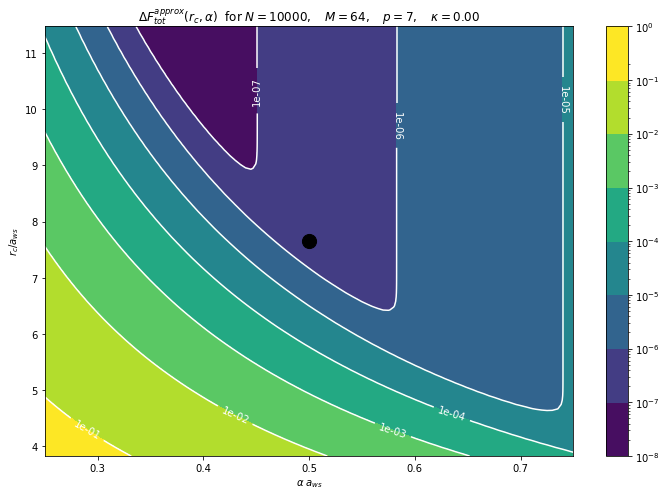

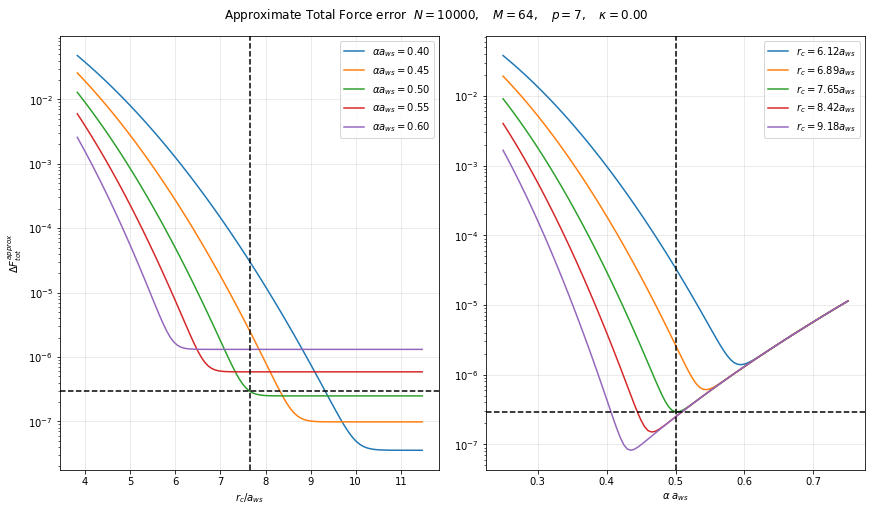

In [2]:
from sarkas.processes import PreProcess

input_file_name = 'sarkas/examples/coulomb_bim_mks.yaml'

preproc = PreProcess(input_file_name)
preproc.setup(read_yaml=True)
preproc.run(loops=50)

In [57]:
#
params = preproc.parameters
w1 = preproc.species[0].wp
no_dumps = int( params.production_steps/params.prod_dump_step)
dt_r = params.dt*params.prod_dump_step
w_min = 2.0*np.pi/(no_dumps * dt_r)
w_max = 2.0*np.pi/(dt_r)
print('wmin = ', w_min/w1)
print('wmax = ',0.5 * w_max/w1)

wmin =  0.001117915463494892
wmax =  33.53746390484676


In [25]:
frequencies = 2.0 * np.pi * np.fft.fftfreq(no_dumps, dt_r)
print(frequencies[1]/w1)
print(frequencies.max()/w1)

0.001117915463494892
33.536345989383264


In [52]:
wmax = 9.99197e+00 *  5.047973e+11
dt_c = 6.603310e-14
dt_dh = 2.0*np.pi/(wmax)
print("dt = ", dt_dh)
wmin = 5.75243e-03 *  5.047973e+11
M = np.pi*2.0/(wmin * dt_c)
print(int( M))

dt =  1.2456950066277333e-12
32767


In [56]:
10/2.87621e-03


3476.7975912746288